<a href="https://colab.research.google.com/github/dsevero/generative-models/blob/master/experiments/Bayes-by-Backprop/notebooks/Gaussian_variational_posterior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

$$\mathbf{\epsilon} \sim \mathcal{N}\left(0,I\right)$$
$$w_i=\mu + \epsilon_i\log(1 + exp(\rho)) = \mu + \epsilon_i\sigma$$
$$ q_\theta(w) = \mathcal{N}\left(w|\mu,\sigma^2\right), \forall w\in\mathbf{w}$$

In [0]:
# parameters
θ = np.zeros(2)
μ = θ[0]
ρ = θ[1]

In [0]:
def t(θ, ϵ):
    μ = θ[0]
    ρ = θ[1]
    return μ + np.log(1 + np.exp(ρ))*ϵ

ϵ = multivariate_normal(cov=np.eye(1)).rvs()
w = t(θ, ϵ)

$$ f(\mathbf{w}, \theta) = \log q_\theta(\mathbf{w}) - \log P(\mathbf{w})P(\mathcal{D}|\mathbf{w}) =\log q_\theta(\mathbf{w}) -\log P(\mathbf{w}) - \sum_{i=1}^{N}\log P(d^{(i)}|\mathbf{w}) $$

Assuming a uniform prior on $P(\mathbf{w})$ and a linear model $P(d^{(i)}|\mathbf{w}) = \mathcal{N}\left(y^{(i)}|x^{(i)}, \mathbf{w}\right)$

$$ f(\mathbf{w}, \theta) = \sum_{w\in\mathbf{w}}\log q_\theta(w) - \sum_{i=1}^{N}\log P(d^{(i)}|\mathbf{w}))$$

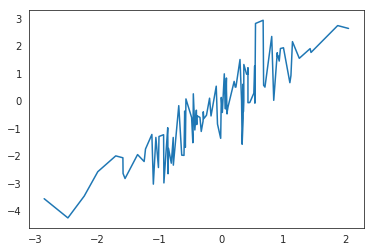

In [80]:
x = multivariate_normal(cov=1).rvs(100)
noise = multivariate_normal(cov=1).rvs(100)
y = 1.5*x + noise
sns.lineplot(x, y);